# SVM

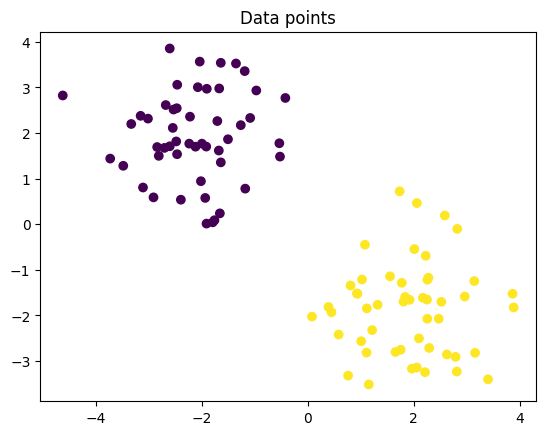

         Current function value: 0.010059
         Iterations: 6
         Function evaluations: 650
         Gradient evaluations: 160


C:\Users\arhaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minimize.py:726: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


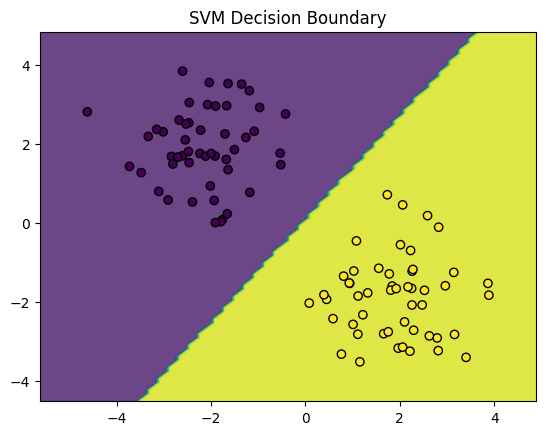

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        # Convert labels to -1 and 1
        y_ = np.where(y <= 0, -1, 1)
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]
                    
    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)
    
    def plot_decision_boundary(self, X, y):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
        plt.title("SVM Decision Boundary")
        plt.show()

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=42)
y = np.where(y == 0, -1, 1) # Convert labels to -1 and 1

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Data points")
plt.show()

# Train the SVM
svm = SVM()
svm.fit(X, y)

# Make predictions and visualize the results
predictions = svm.predict(X)
svm.plot_decision_boundary(X, y)
